In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("HousingData.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.rename(columns={"MEDV":"price"},inplace=True)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
missing_count = df.isnull().sum()
missing_percent = (missing_count/len(df))*100
missing_df = pd.DataFrame({
    'missing_values':missing_count,
    'percent':missing_percent
})

In [16]:
missing_df

,missing_values,percent
CRIM,20,3.952569
ZN,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
NOX,0,0.000000
RM,0,0.000000
AGE,20,3.952569
DIS,0,0.000000
RAD,0,0.000000
TAX,0,0.000000


In [18]:
df.shape

(506, 14)

In [19]:
df=df.dropna()

In [20]:
df.shape

(394, 14)

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [22]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [23]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


In [24]:
corr_matrix = df.corr()

In [25]:
corr_matrix['price'].sort_values(ascending=False)

price      1.000000
RM         0.723951
ZN         0.406822
B          0.347256
DIS        0.279547
CHAS       0.173701
CRIM      -0.397230
AGE       -0.407470
RAD       -0.416638
NOX       -0.459054
TAX       -0.508864
INDUS     -0.510829
PTRATIO   -0.543809
LSTAT     -0.743450
Name: price, dtype: float64

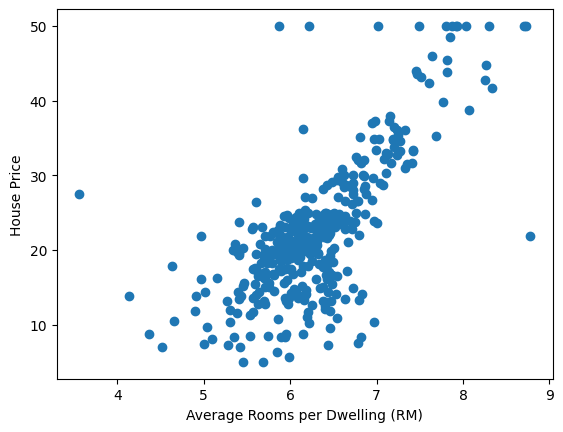

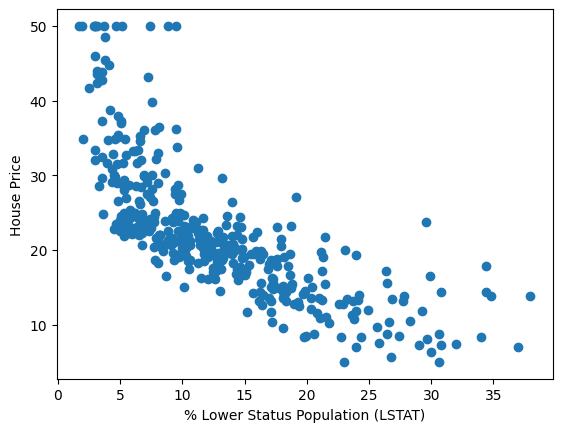

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df['RM'], df['price'])
plt.xlabel("Average Rooms per Dwelling (RM)")
plt.ylabel("House Price")
plt.show()

plt.scatter(df['LSTAT'], df['price'])
plt.xlabel("% Lower Status Population (LSTAT)")
plt.ylabel("House Price")
plt.show()


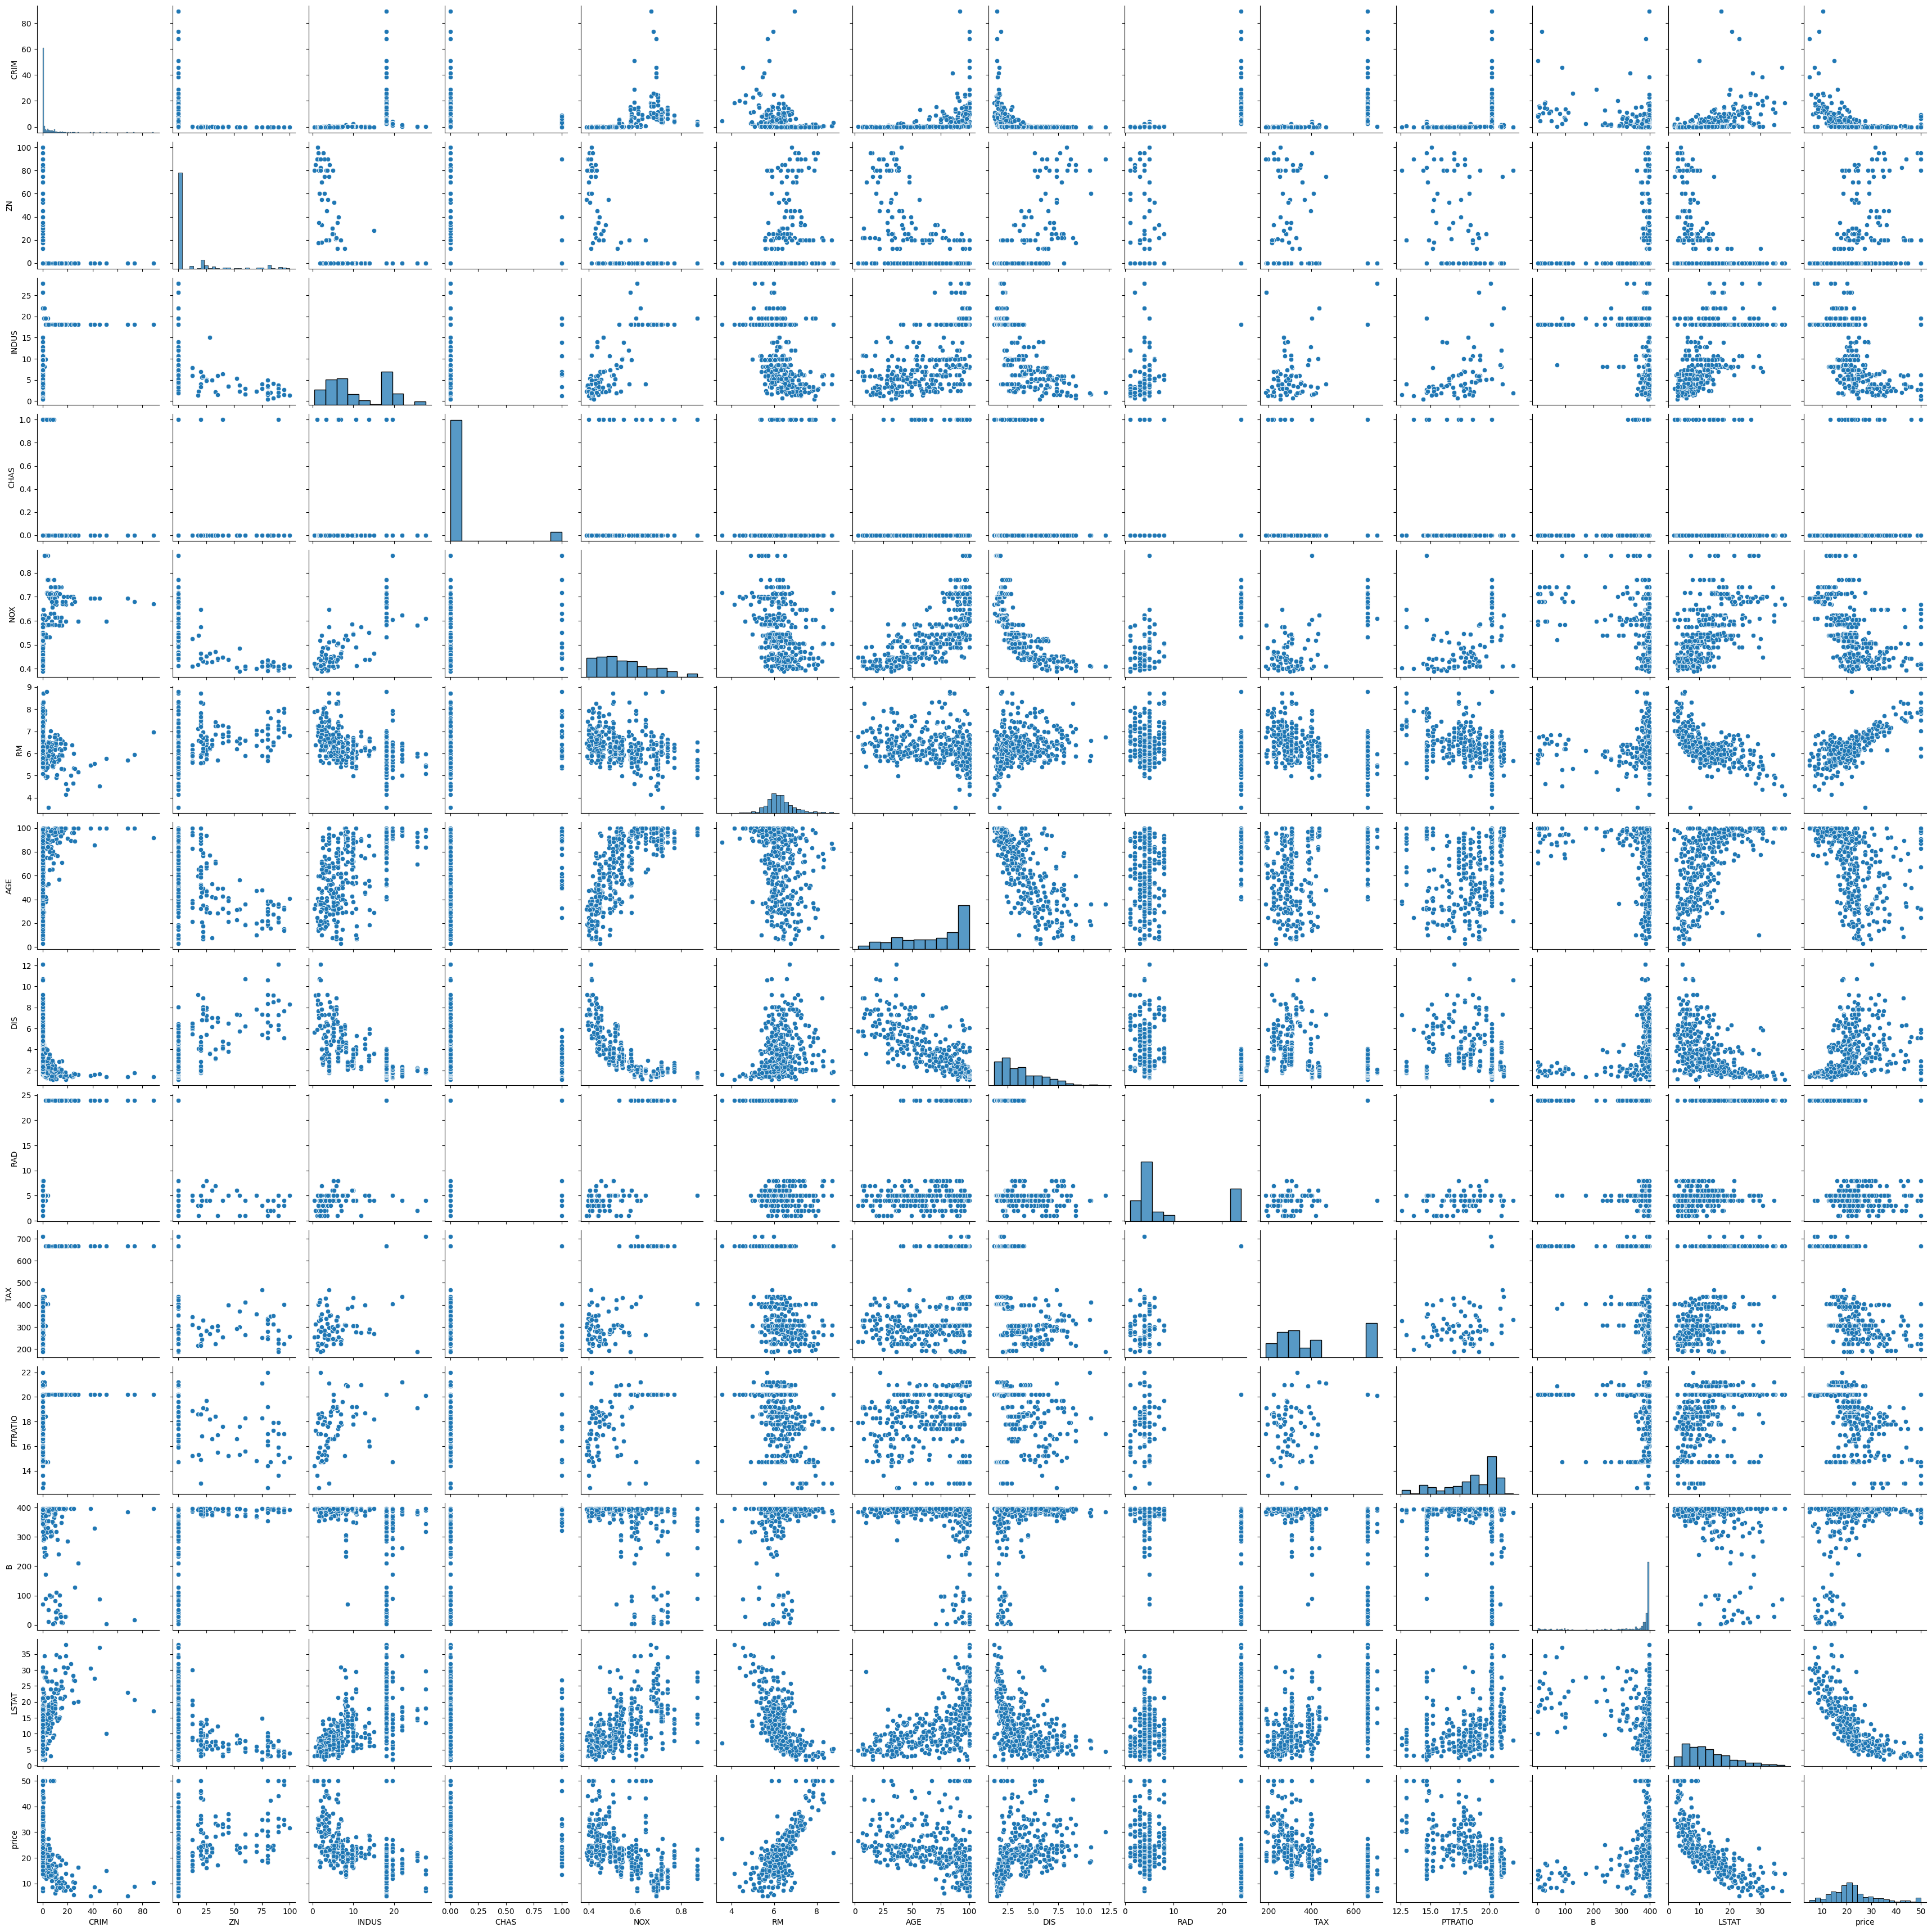

In [31]:
import seaborn as sn
sn.pairplot(df)

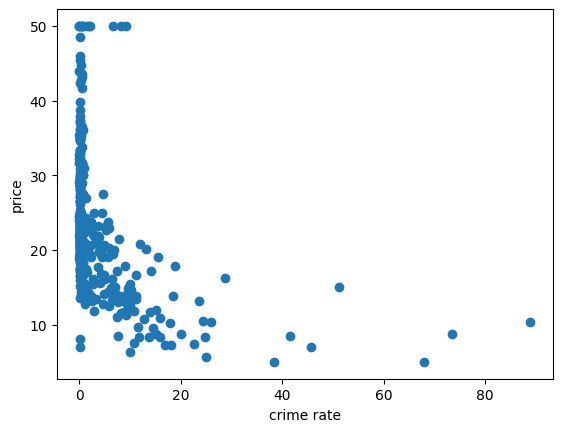

In [30]:
plt.scatter(df['CRIM'],df['price'])
plt.xlabel('crime rate')
plt.ylabel('price')
plt.show()

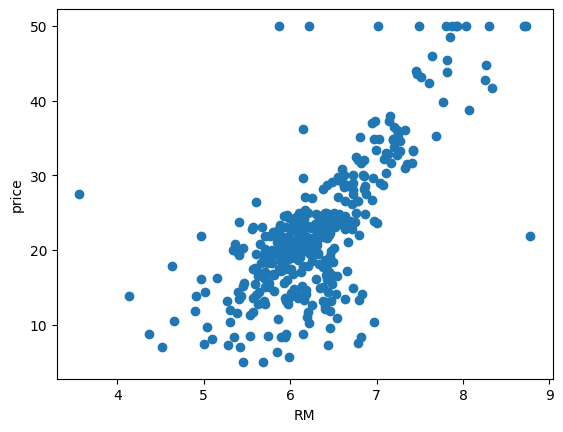

In [32]:
plt.scatter(df['RM'],df['price'])
plt.xlabel('RM')
plt.ylabel('price')
plt.show()

<Axes: xlabel='RM', ylabel='price'>

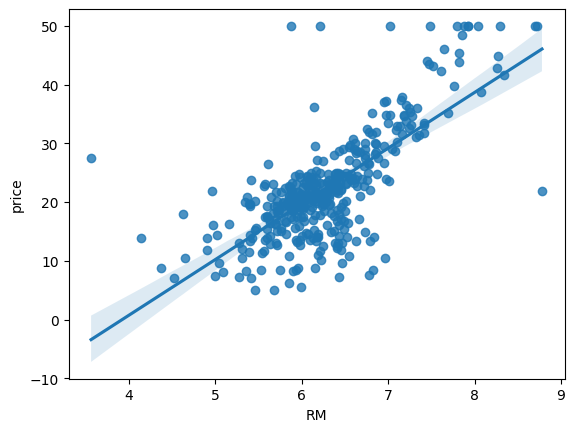

In [33]:
import seaborn as sn 
sn.regplot(x='RM',y='price',data=df)

<Axes: xlabel='LSTAT', ylabel='price'>

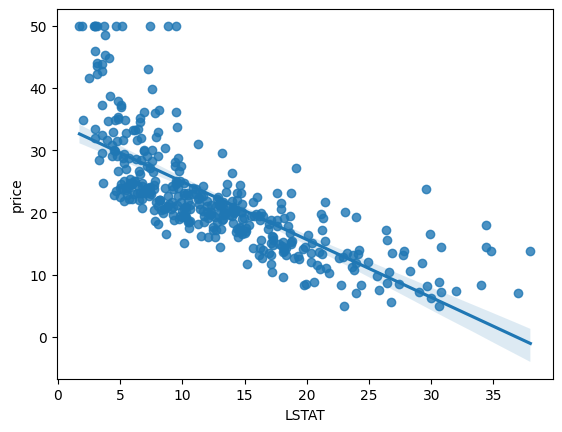

In [34]:
import seaborn as sn 
sn.regplot(x='LSTAT',y='price',data=df)

<Axes: xlabel='CHAS', ylabel='price'>

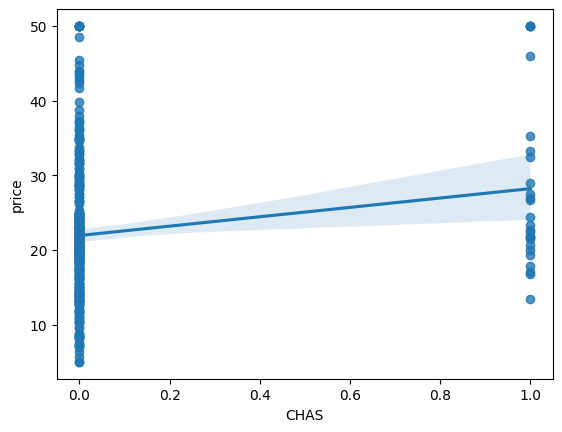

In [35]:
sn.regplot(x='CHAS',y='price',data=df)

<Axes: xlabel='PTRATIO', ylabel='price'>

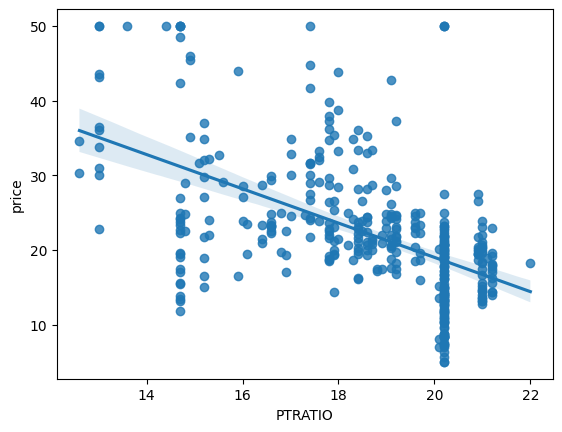

In [36]:
sn.regplot(x='PTRATIO',y='price',data=df)

In [37]:
x = df.drop('price',axis=1)
y=df['price']

In [38]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [39]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: price, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [76]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
x_train_scaled=scaler.fit_transform(x_train)

In [79]:
x_train_scaled

array([[ 0.30669463, -0.46905615,  0.98516338, ...,  0.75107471,
        -0.38387457,  0.35489258],
       [-0.35506872, -0.46905615, -0.75170852, ..., -0.55527097,
         0.32304459, -1.38799511],
       [-0.40275616, -0.46905615,  0.37069021, ..., -1.02182299,
         0.44088232,  0.64734992],
       ...,
       [-0.41092235, -0.46905615, -1.0158882 , ...,  0.09790187,
         0.32014958, -0.32619052],
       [ 0.54343825, -0.46905615,  0.98516338, ...,  0.75107471,
         0.44088232,  0.6750148 ],
       [-0.40457292, -0.46905615,  2.08712834, ...,  0.23786748,
         0.23919645,  0.64866729]])

In [80]:
x_test_scaled = scaler.transform(x_test)

In [81]:
x_test_scaled

array([[-0.41116664,  0.75060046,  0.53853918, ..., -0.18202935,
         0.43477063, -0.8952967 ],
       [-0.40668221,  2.14449373, -1.40996838, ..., -0.13537414,
         0.39188155, -0.68715139],
       [-0.36531444, -0.46905615, -0.21167272, ..., -0.08871894,
         0.4336984 , -0.03636793],
       ...,
       [-0.37795376, -0.46905615,  1.53833519, ...,  1.21762673,
         0.41064552,  0.2086639 ],
       [-0.41079508, -0.46905615, -1.33845013, ...,  0.05124667,
         0.41654277, -1.32607847],
       [-0.28761449, -0.46905615, -0.46855462, ...,  1.12431633,
         0.44088232,  0.75273995]])

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled) 

In [83]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
print(reg.coef_)

[ 2.06974416  1.6184152   0.16586076  1.87681179 -0.13001683  3.89548691
 -0.23939982 -2.52884868  2.79748604 -2.6559865  -1.11532226  1.53211143
 -3.71822356]


In [85]:
print(reg.intercept_)

23.820253164556963


In [86]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [87]:
y_pred = model.predict(x_test_scaled)

In [88]:
print(y_pred)

[29.22850199 17.5037472  21.80803847 30.4942528  18.50265527 34.7432311
 22.07369779 30.7541295  33.52029866 14.82910783 22.14507214 41.26427356
 22.51242483 16.87300668 19.0023074  20.77110711 17.26921288 15.48568273
 22.69482862 14.12652975 18.19319969 20.48292217 17.04235173 29.66737037
 26.09718411 16.06132841 27.09746911 31.45656662 22.64238912 27.06681913
 41.10181897 18.21320236 23.062681   17.41202659 17.39546606 21.076803
 22.38598488 21.66963934 22.9118984  20.80249561 27.70046219 34.60121409
 22.25931447 30.83868791 35.33229137 19.76393425 24.99195034 10.39133132
 19.75538217 25.31114768 21.55934818 25.89776968 14.23212614 18.66822307
 18.34126683 24.31756905 43.40891373 22.87668508 15.3452895  23.17268086
 21.11796307 21.4821572  14.66508216 28.92300146 -3.71655126 32.60224615
 16.81628299 31.90077457 24.78013157 20.11600672 31.55246209 32.35712749
 18.87519084 19.5714957  19.26577986 35.60775919 19.34796049 28.48982534
 16.32963606]


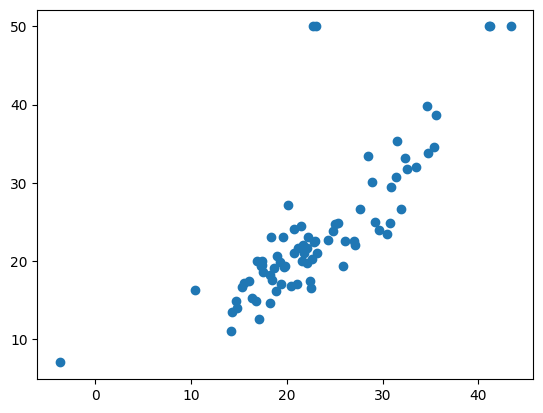

In [89]:
plt.scatter(y_pred,y_test)


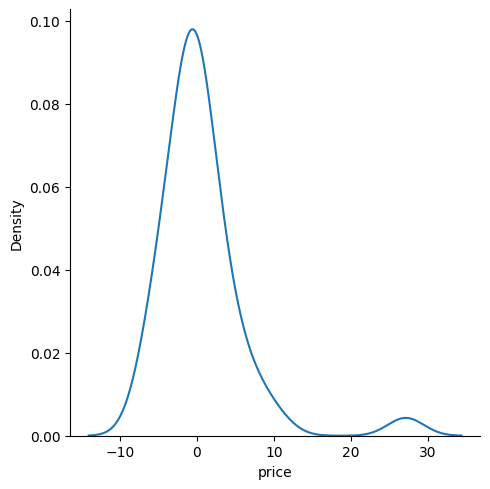

In [90]:
residuals = y_test-y_pred
sn.displot(residuals,kind='kde')

### 🔹 Interpretation of Residuals

- **Centered around 0 and roughly normal (bell-shaped)** → Good model fit.  
- **Skewed or long tails** → Model may be missing patterns in the data.  
- **Far from zero** → Model predictions are biased.  


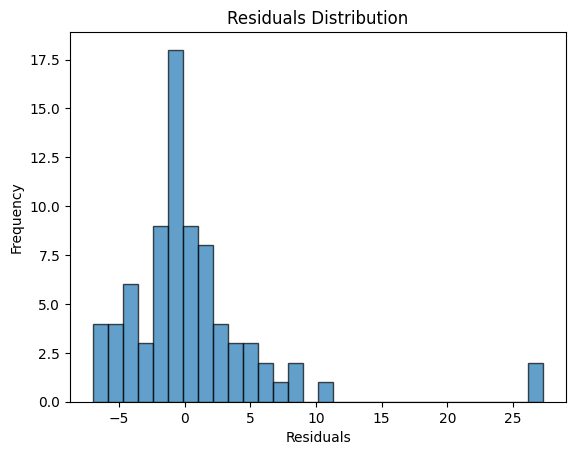

In [91]:
import matplotlib.pyplot as plt

plt.hist(residuals, bins=30, edgecolor="black", alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


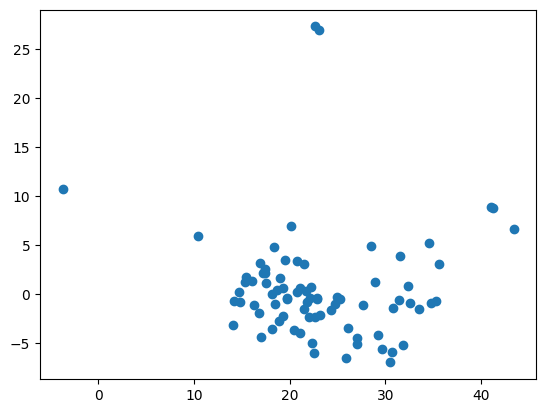

In [92]:
plt.scatter(y_pred,residuals)

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [94]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


31.454047664950842
3.3679832251542403
5.608390826694484


## R^2 = 1−Total Sum of Squares (SST)/Sum of Squared Errors (SSE)

In [95]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.6270849941673194


## 📊 Adjusted R²

### 🔎 Why Adjusted R²?
- **R²** always increases when you add more features, even if they are useless.  
- **Adjusted R²** corrects this by penalizing the addition of unnecessary predictors.  

---

## 🧮 Adjusted R²

The formula is:

$$
Adjusted\ R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$

Where:  
- \(n\) = number of observations (rows)  
- \(p\) = number of predictors (features)  
- \(R^2\) = coefficient of determination


### 🔗 Key Points
- **R²** → Explains variance in data.  
- **Adjusted R²** → Explains variance **considering number of features**.  
- For **1 feature regression**, R² and Adjusted R² are the same.  

In [96]:
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
adj_r2

0.5525019930007833

In [97]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [98]:
# Select first row as DataFrame (double brackets!)
arr_df = x.iloc[[0]]  # shape (1, n_features)

# Scale
arr_scaled = scaler.transform(arr_df)

# Predict
pred = reg.predict(arr_scaled)
print(pred)


[29.34155143]


In [99]:
# Select first row as DataFrame (double brackets!)
arr_df = x.iloc[[1]]  # shape (1, n_features)

# Scale
arr_scaled = scaler.transform(arr_df)

# Predict
pred = reg.predict(arr_scaled)
print(pred)


[24.03687406]


In [103]:
import pickle 
pickle.dump(reg,open("reg_model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))
pickled_model=pickle.load(open("reg_model.pkl","rb"))
pickled_model.predict(scaler.transform(arr_df))

array([24.03687406])